In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import interpolate

In [ ]:
df = pd.read_csv('World Bank Development Indicators_1.csv')
df

,country,year,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,bachelor_female%,employment_female%,GNI_current_US,infant_deaths,early_marriage%
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8622466.0,7898093.0,NaN,NaN,NaN,NaN,NaN,5.488888e+08,NaN,NaN
1,Afghanistan,1961,57.801696,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,8790140.0,8026804.0,NaN,NaN,NaN,NaN,NaN,5.600000e+08,NaN,NaN
2,Afghanistan,1962,57.893688,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,8969047.0,8163985.0,NaN,NaN,NaN,NaN,NaN,5.577778e+08,NaN,NaN
3,Afghanistan,1963,57.970348,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,9157465.0,8308019.0,NaN,NaN,NaN,NaN,NaN,7.666667e+08,NaN,NaN
4,Afghanistan,1964,58.066940,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,9355514.0,8458694.0,NaN,NaN,NaN,NaN,NaN,8.155556e+08,101795.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,Zimbabwe,2018,41.876696,45.332093,386850.0,657.0,4.469742,-1.227581,0.125622,45.400288,...,15052184.0,10204026.0,-1.140975,0.123371,4.876369,NaN,56.689,3.344290e+10,18216.0,NaN
16754,Zimbabwe,2019,41.876696,45.213002,386850.0,657.0,6.927164,-1.273280,0.135450,46.682095,...,15354608.0,10408889.0,-1.164705,0.118156,5.145035,NaN,56.485,2.148784e+10,17852.0,5.4
16755,Zimbabwe,2020,41.876696,45.093912,386850.0,657.0,5.118949,-1.289440,0.142061,52.747667,...,15669666.0,10617452.0,-1.113716,0.120647,4.977770,NaN,55.699,2.103160e+10,17656.0,NaN
16756,Zimbabwe,2021,NaN,NaN,NaN,NaN,NaN,-1.257897,0.154067,48.979927,...,15993524.0,10827136.0,-1.136934,0.121119,6.139985,NaN,55.975,2.767225e+10,17309.0,NaN


In [ ]:
# 중복된 데이터 확인
print(df.shape)
print(df.duplicated().sum())

(16758, 55)
0


# **데이터 전처리**

## **변수 생성 및 삭제**

In [ ]:
#결측치 개수 확인
df.isnull().sum()

country                                          0
year                                             0
agricultural_land%                            1460
forest_land%                                  8844
land_area                                     1150
avg_precipitation                             6672
trade_in_services%                            7593
control_of_corruption_estimate               12194
control_of_corruption_std                    12194
access_to_electricity%                        9410
renewvable_energy_consumption%                8682
electric_power_consumption                    8968
CO2_emisions                                  9350
other_greenhouse_emisions                     9350
population_density                            1179
inflation_annual%                             5983
real_interest_rate                           12361
risk_premium_on_lending                      14391
research_and_development_expenditure%        13982
central_goverment_debt%        

In [ ]:
#결측치가 전체 데이터의 70%이상인 column 제거
eli_columns = ['control_of_corruption_estimate','control_of_corruption_std','real_interest_rate','risk_premium_on_lending','gini_index',
              'research_and_development_expenditure%','central_goverment_debt%','tax_revenue%','expense%','goverment_effectiveness_estimate',
              'goverment_effectiveness_std','human_capital_index','doing_business','time_to_get_operation_license','statistical_performance_indicators',
              'logistic_performance_index','political_stability_estimate','political_stability_std','rule_of_law_estimate','rule_of_law_std',
              'regulatory_quality_estimate','regulatory_quality_std','government_health_expenditure%','multidimensional_poverty_headcount_ratio%',
               'voice_and_accountability_estimate','voice_and_accountability_std','intentional_homicides','bachelor_female%','early_marriage%']
print(len(eli_columns))

29


In [ ]:
df = df.drop(eli_columns, axis=1)

In [ ]:
df.drop(['forest_land%', 'land_area', 'avg_precipitation', 'renewvable_energy_consumption%',
         'trade_in_services%', 'CO2_emisions', 'other_greenhouse_emisions'],axis=1,inplace=True)

In [ ]:
def gdp(df,x,y):
    df['GDP'] = df[x]/df[y]
    return df
def gni(df,x,y):
    df['GNI'] = df[x]/df[y]
    return df
def infant(df,x,y,z):
    df['infant'] = df[x]/((df[y]/1000)*df[z])*1000
def rural_population(df,x,y):
    df['rural_population%']=df[x]/df[y]
    return df

gdp(df,'GDP_current_US','population')
gni(df,'GNI_current_US','population')
infant(df,'infant_deaths','birth_rate','population')
rural_population(df,'rural_population','population')
df = df.drop(['GDP_current_US','GNI_current_US','infant_deaths','rural_population'],axis=1)

In [ ]:
df.isnull().sum() #forest_land%, land_area, avg_percipitation, renewvable_energy_consumption%, trade_services%, CO2_emisions, other_greedhouse_emisions
# rural_population/population

country                                     0
year                                        0
agricultural_land%                       1460
access_to_electricity%                   9410
electric_power_consumption               8968
population_density                       1179
inflation_annual%                        5983
individuals_using_internet%              8783
military_expenditure%                    6841
government_expenditure_on_education%    10807
birth_rate                                721
death_rate                                739
life_expectancy_at_birth                  892
population                                 93
employment_female%                       9246
GDP                                      3393
GNI                                      4313
infant                                   4330
rural_population%                         219
dtype: int64

## **시계열 선형 보간**

In [ ]:
# 시계열 선형 보간법으로 결측치 처리 => 남은 결측치는 나라마다 각 항목에 데이터가 없는 것
columns = list(df.columns)
for i in columns:
    df[i] = df.groupby('country')[i].transform(
        lambda x: x.interpolate(method='values',limit_direction='both'))

In [ ]:
df.isnull().sum()

country                                    0
year                                       0
agricultural_land%                       567
access_to_electricity%                   126
electric_power_consumption              5040
population_density                       189
inflation_annual%                       1638
individuals_using_internet%              315
military_expenditure%                   3402
government_expenditure_on_education%    1008
birth_rate                                63
death_rate                                63
life_expectancy_at_birth                 378
population                                63
employment_female%                      1953
GDP                                      252
GNI                                      567
infant                                  1386
rural_population%                        189
dtype: int64

In [ ]:
df

,country,year,agricultural_land%,access_to_electricity%,electric_power_consumption,population_density,inflation_annual%,individuals_using_internet%,military_expenditure%,government_expenditure_on_education%,birth_rate,death_rate,life_expectancy_at_birth,population,employment_female%,GDP,GNI,infant,rural_population%
0,Afghanistan,1960,57.801696,4.446891,NaN,13.477056,12.686269,0.000000,1.629606,1.16036,50.340,31.921,32.535,8622466.0,14.000,62.369375,63.657989,214.057348,0.91599
1,Afghanistan,1961,57.801696,4.446891,NaN,13.477056,12.686269,0.000000,1.629606,1.16036,50.443,31.349,33.068,8790140.0,14.000,62.443703,63.707748,214.057348,0.91316
2,Afghanistan,1962,57.893688,4.446891,NaN,13.751356,12.686269,0.000000,1.629606,1.16036,50.570,30.845,33.547,8969047.0,14.000,60.950364,62.189194,214.057348,0.91024
3,Afghanistan,1963,57.970348,4.446891,NaN,14.040239,12.686269,0.000000,1.629606,1.16036,50.703,30.359,34.016,9157465.0,14.000,82.021738,83.720408,214.057348,0.90724
4,Afghanistan,1964,58.066940,4.446891,NaN,14.343888,12.686269,0.000000,1.629606,1.16036,50.831,29.867,34.494,9355514.0,14.000,85.511073,87.173785,214.057348,0.90414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,Zimbabwe,2018,41.876696,45.400288,597.297022,38.909614,10.618866,25.000000,0.309323,3.86611,32.074,7.972,61.414,15052184.0,56.689,2269.177012,2221.797114,37.731179,0.67791
16754,Zimbabwe,2019,41.876696,46.682095,597.297022,39.691374,255.304991,26.588274,0.534804,3.86611,31.518,8.043,61.292,15354608.0,56.485,1421.868596,1399.438947,36.888372,0.67790
16755,Zimbabwe,2020,41.876696,52.747667,597.297022,40.505793,557.201817,29.298565,0.005400,3.86611,31.009,8.132,61.124,15669666.0,55.699,1372.696674,1342.185280,36.336644,0.67758
16756,Zimbabwe,2021,41.876696,48.979927,597.297022,40.505793,98.546105,34.813971,0.013530,3.86611,30.537,9.057,59.253,15993524.0,55.975,1773.920411,1730.215966,35.440631,0.67697


In [ ]:
df = df.dropna()

In [ ]:
df['country'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Albania', 'Algeria', 'Angola', 'Arab World', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean small states', 'Central Europe and the Baltics',
       'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Ethiopia',
       'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
 

In [ ]:
df=df[~df['country'].isin(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
       'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)',
       'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)',
       'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
       'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification',
       'Low & middle income', 'Lower middle income', 'Middle East & North Africa',
       'Middle East & North Africa (IDA & IBRD countries)', 'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'Post-demographic dividend', 'Pre-demographic dividend',
       'South Africa', 'South Asia', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World'])]

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
len(df['country'].unique())

127

# **EDA**

In [ ]:
df.describe()

,year,agricultural_land%,access_to_electricity%,electric_power_consumption,population_density,inflation_annual%,individuals_using_internet%,military_expenditure%,government_expenditure_on_education%,birth_rate,death_rate,life_expectancy_at_birth,population,employment_female%,GDP,GNI,infant,rural_population%
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8.001000e+03,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,1991.000000,40.019727,80.188153,2897.714521,150.702299,92.988888,15.188956,2.864243,4.164708,26.421838,10.194491,65.939532,4.016524e+07,44.163450,7789.241552,7692.955648,45.678136,0.457511
std,18.185379,20.769562,29.976001,3828.580034,498.408413,533.043327,27.254000,3.099133,2.124808,13.238141,5.122073,10.742936,1.339534e+08,15.867703,14157.991037,13569.106438,43.022390,0.230357
min,1960.000000,0.919220,0.796383,5.548906,0.653662,-16.117326,0.000000,0.000017,0.000000,5.100000,0.795000,11.995000,3.638500e+04,4.359000,12.786964,12.788657,1.535159,0.000000
25%,1975.000000,23.829554,69.607880,287.406535,20.158638,2.459900,0.000000,1.234155,2.815750,14.700000,6.888000,59.193000,3.550368e+06,33.221000,651.419210,626.580183,12.179872,0.268370
50%,1991.000000,41.876696,99.000000,1469.987665,63.246218,6.176276,0.036775,2.065379,3.982820,23.200000,9.400000,68.975610,9.111900e+06,45.591000,2124.767944,2135.520680,29.665295,0.451430
75%,2007.000000,54.667771,100.000000,4023.432070,119.946788,13.779745,17.100000,3.484865,5.257580,38.232000,12.100000,73.612683,2.851654e+07,53.978000,7417.206585,7327.432613,67.717664,0.633670
max,2022.000000,93.440750,100.000000,25590.689429,7965.878492,23773.131774,100.000000,117.349823,44.333981,58.121000,86.575000,84.560000,1.417173e+09,85.746000,133590.146976,109422.778689,256.703683,0.969399


## **Target EDA**

<Axes: xlabel='birth_rate', ylabel='Count'>

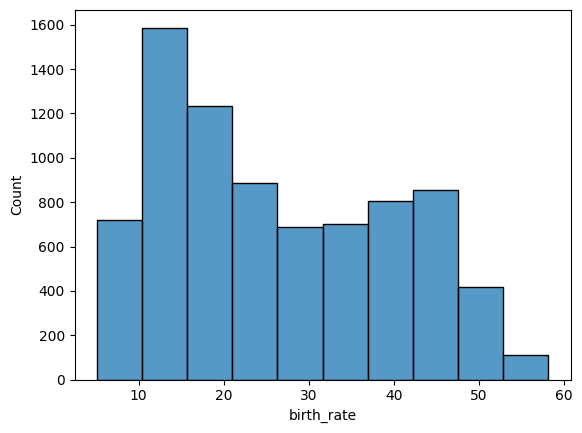

In [ ]:
# birth_rate 일정 값 이상 나라 제거 후 target 값인 birth_rate 분포 확인
target = df['birth_rate']
sns.histplot(data=target, bins=10)

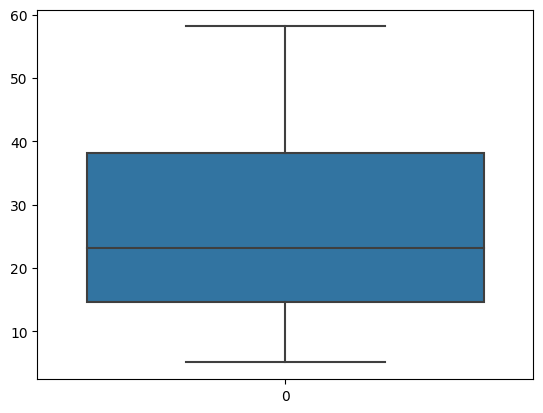

In [ ]:
# target 변수 box-plot 확인
sns.boxplot(data=target)
plt.show()

## **Features EDA**

In [ ]:
features = df.columns.difference(['country','year','birth_rate'])
features = list(features)
print(features)
len(features)

['GDP', 'GNI', 'access_to_electricity%', 'agricultural_land%', 'death_rate', 'electric_power_consumption', 'employment_female%', 'government_expenditure_on_education%', 'individuals_using_internet%', 'infant', 'inflation_annual%', 'life_expectancy_at_birth', 'military_expenditure%', 'population', 'population_density', 'rural_population%']


16

### **경제적 요인**

In [ ]:
# 경제적 요인
eco_features = ['GDP', 'GNI', 'employment_female%', 'government_expenditure_on_education%', 'inflation_annual%', 'military_expenditure%']
len(eco_features)

6

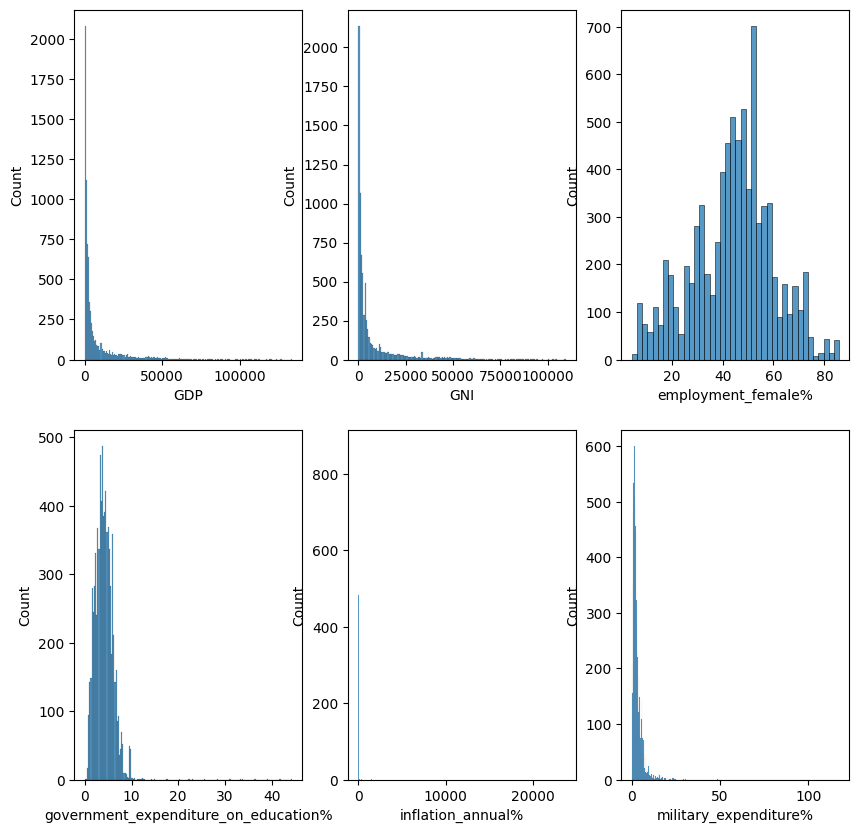

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

for row in range(2):
    for col in range(3):
        idx = row*3+col
        if idx < len(eco_features):
            ax = axes[row][col]
            eco = eco_features[idx]
            sns.histplot(data=df[eco], ax=ax)
            ax.set(xlabel=eco)

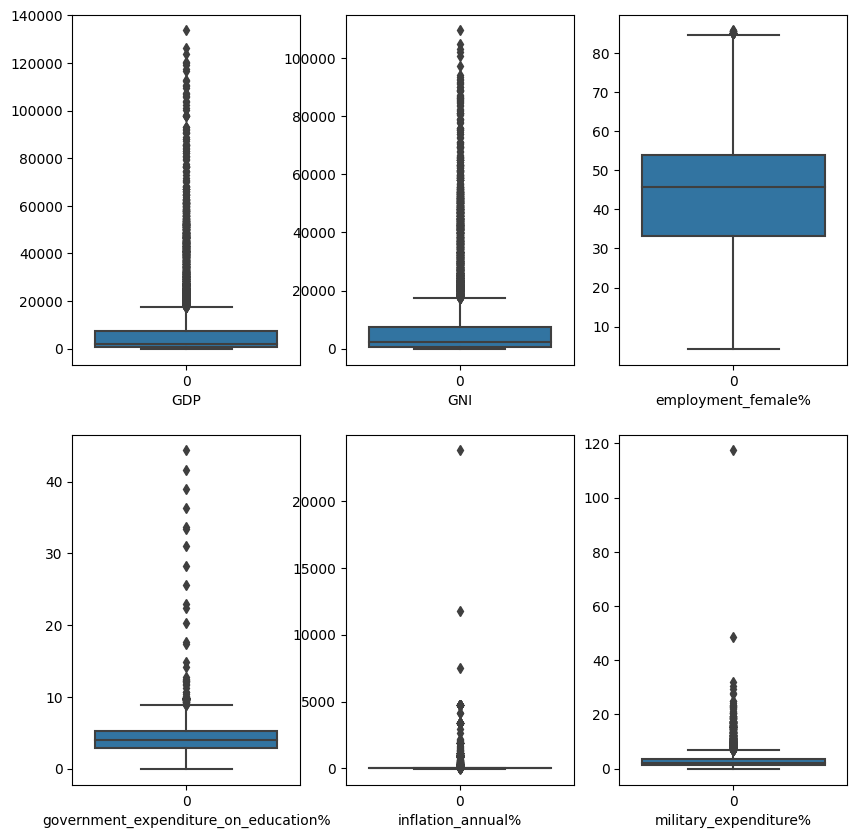

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

for row in range(2):
    for col in range(3):
        idx = row*3+col
        if idx < len(eco_features):
            ax = axes[row][col]
            eco = eco_features[idx]
            sns.boxplot(data=df[eco], ax=ax)
            ax.set(xlabel=eco)

### **인구사회학적 요인**

In [ ]:
# 인구사회학적 요인
social_features = ['population_density', 'death_rate', 'population','life_expectancy_at_birth','rural_population%','infant']
len(social_features)

6

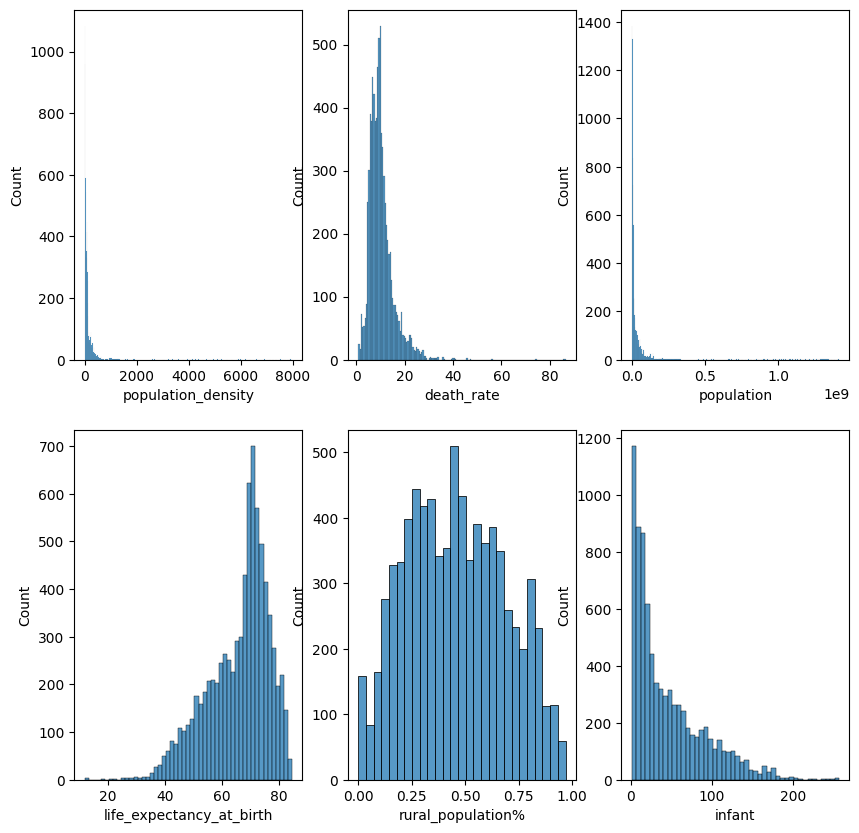

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

for row in range(2):
    for col in range(3):
        idx = row*3+col
        if idx < len(social_features):
            ax = axes[row][col]
            social = social_features[idx]
            sns.histplot(data=df[social], ax=ax)
            ax.set(xlabel=social)

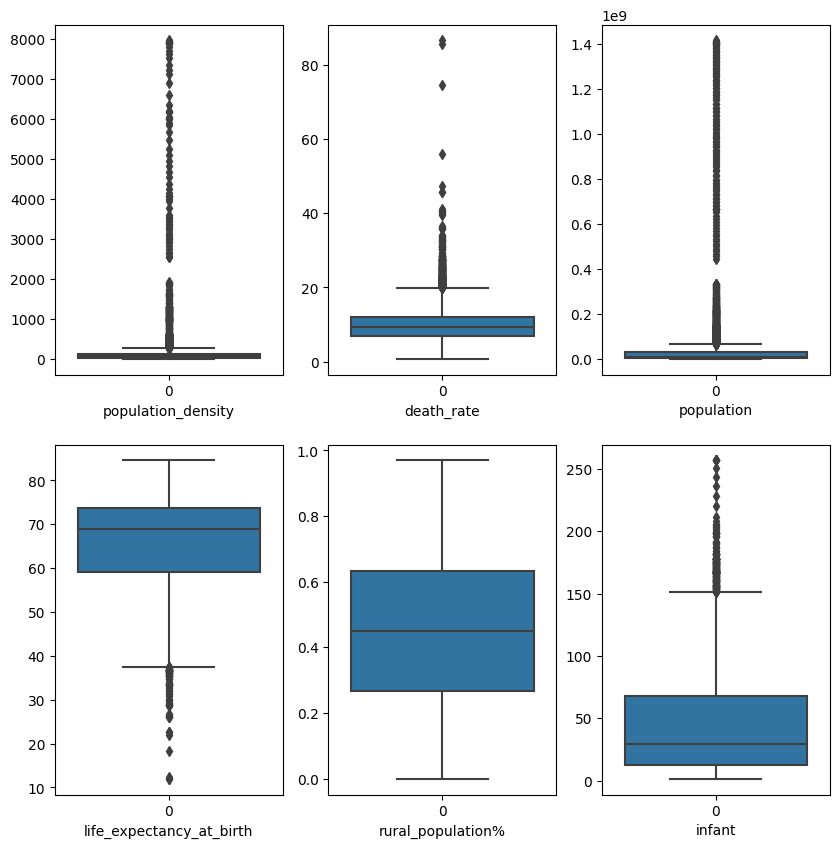

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

for row in range(2):
    for col in range(3):
        idx = row*3+col
        if idx < len(social_features):
            ax = axes[row][col]
            social = social_features[idx]
            sns.boxplot(data=df[social], ax=ax)
            ax.set(xlabel=social)

In [ ]:
features

['GDP',
 'GNI',
 'access_to_electricity%',
 'agricultural_land%',
 'death_rate',
 'electric_power_consumption',
 'employment_female%',
 'government_expenditure_on_education%',
 'individuals_using_internet%',
 'infant',
 'inflation_annual%',
 'life_expectancy_at_birth',
 'military_expenditure%',
 'population',
 'population_density',
 'rural_population%']

### **환경 및 기타 요인**

In [ ]:
# 환경 및 기타 요인
other_features = ['agricultural_land%','electric_power_consumption','individuals_using_internet%']

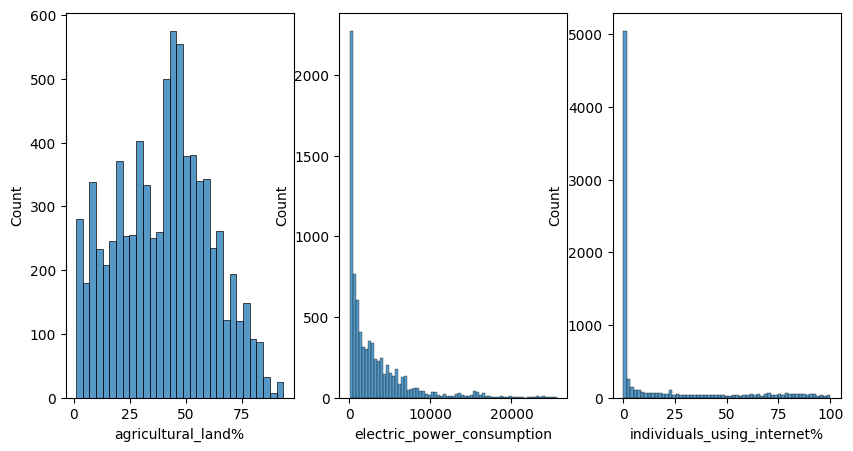

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

for col in range(3):
    other = other_features[col]
    sns.histplot(data=df[other], ax=axes[col])
    axes[col].set(xlabel=other)

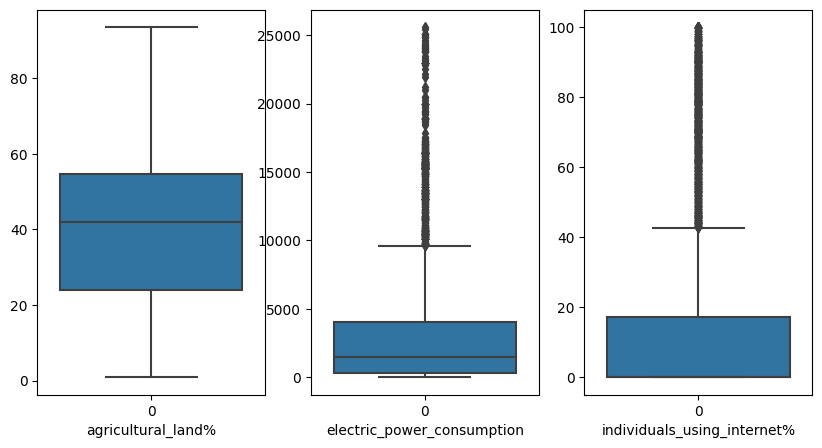

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

for col in range(3):
    other = other_features[col]
    sns.boxplot(data=df[other], ax=axes[col])
    axes[col].set(xlabel=other)

## **Scaling**

In [ ]:
# feature, target 변수 스케일링(minmaxscaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['year','birth_rate'])
scaled_data = scaler.fit_transform(numeric_columns)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)
scaled_df['birth_rate'] = df['birth_rate']
scaled_df['year'] = df['year']
scaled_df['country'] = df['country']
scaled_df

,agricultural_land%,access_to_electricity%,electric_power_consumption,population_density,inflation_annual%,individuals_using_internet%,military_expenditure%,government_expenditure_on_education%,death_rate,life_expectancy_at_birth,population,employment_female%,GDP,GNI,infant,rural_population%,birth_rate,year,country
0,0.476044,1.000000,0.020578,0.007523,0.010178,0.000000,0.051572,0.077750,0.185195,0.584910,0.001110,0.546561,0.004692,0.005738,0.299025,0.714824,41.068,1960,Albania
1,0.476044,1.000000,0.020578,0.007523,0.010178,0.000000,0.051572,0.077750,0.174166,0.601378,0.001146,0.546561,0.004692,0.005738,0.299025,0.712369,40.332,1961,Albania
2,0.476044,1.000000,0.020578,0.007759,0.010178,0.000000,0.051572,0.077750,0.164094,0.615669,0.001182,0.546561,0.004692,0.005738,0.299025,0.711626,39.216,1962,Albania
3,0.476438,1.000000,0.020578,0.007994,0.010178,0.000000,0.051572,0.077750,0.152984,0.631834,0.001218,0.546561,0.004692,0.005738,0.299025,0.710894,38.149,1963,Albania
4,0.475255,1.000000,0.020578,0.008230,0.010178,0.000000,0.051572,0.077750,0.142201,0.647530,0.001254,0.546561,0.004692,0.005738,0.299025,0.710151,36.825,1964,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,0.442680,0.449620,0.023129,0.004803,0.001124,0.250000,0.002636,0.087204,0.083668,0.681031,0.010596,0.642977,0.016892,0.020190,0.141851,0.699309,32.074,2018,Zimbabwe
7997,0.442680,0.462541,0.023129,0.004901,0.011409,0.265883,0.004557,0.087204,0.084495,0.679350,0.010809,0.640471,0.010549,0.012674,0.138548,0.699299,31.518,2019,Zimbabwe
7998,0.442680,0.523683,0.023129,0.005003,0.024100,0.292986,0.000046,0.087204,0.085533,0.677034,0.011032,0.630813,0.010181,0.012151,0.136386,0.698969,31.009,2020,Zimbabwe
7999,0.442680,0.485704,0.023129,0.005003,0.004820,0.348140,0.000115,0.087204,0.096316,0.651251,0.011260,0.634204,0.013184,0.015697,0.132875,0.698340,30.537,2021,Zimbabwe


In [ ]:
scaled_df.describe()

,agricultural_land%,access_to_electricity%,electric_power_consumption,population_density,inflation_annual%,individuals_using_internet%,military_expenditure%,government_expenditure_on_education%,death_rate,life_expectancy_at_birth,population,employment_female%,GDP,GNI,infant,rural_population%,birth_rate,year
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,0.422610,0.800291,0.113041,0.018838,0.004586,0.151890,0.024408,0.093939,0.109577,0.743396,0.028317,0.489076,0.058217,0.070196,0.172995,0.471954,26.421838,1991.000000
std,0.224484,0.302166,0.149641,0.062573,0.022407,0.272540,0.026409,0.047927,0.059712,0.148046,0.094524,0.194966,0.105991,0.124021,0.168604,0.237628,13.238141,18.185379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,1960.000000
25%,0.247622,0.693639,0.011016,0.002449,0.000781,0.000000,0.010517,0.063512,0.071031,0.650424,0.002480,0.354627,0.004781,0.005610,0.041716,0.276842,14.700000,1975.000000
50%,0.442680,0.989920,0.057238,0.007858,0.000937,0.000368,0.017600,0.089837,0.100315,0.785235,0.006404,0.506617,0.015811,0.019402,0.110241,0.465680,23.200000,1991.000000
75%,0.580930,1.000000,0.157040,0.014977,0.001257,0.171000,0.029696,0.118590,0.131791,0.849138,0.020097,0.609667,0.055432,0.066855,0.259368,0.653673,38.232000,2007.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,58.121000,2022.000000


# **최종 변수 선택**

## **상관관계 분석**

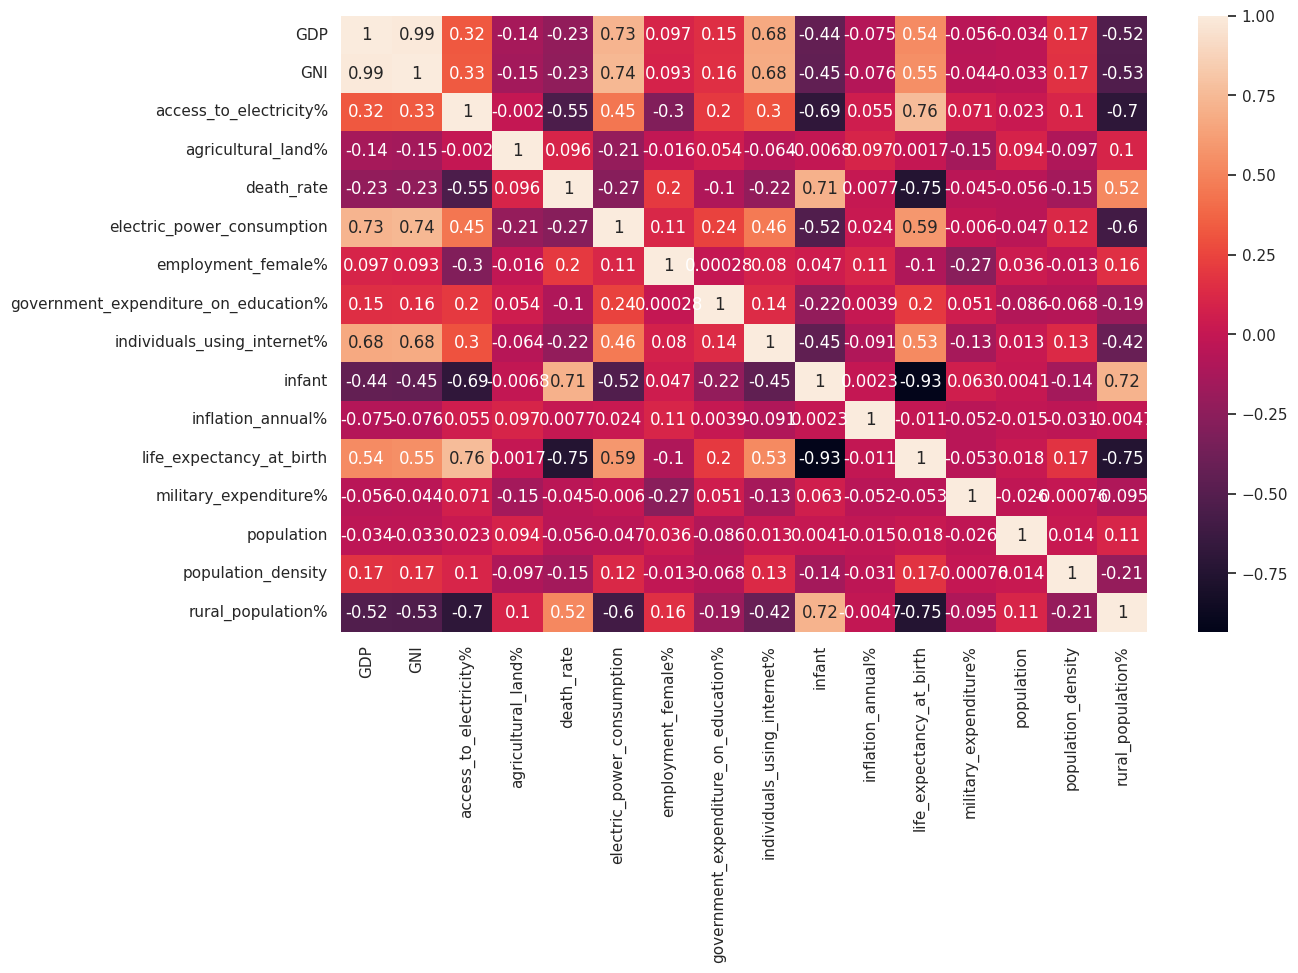

In [ ]:
df_cor = df[df.columns.difference(['country','year','birth_rate'])]
sns.set(font_scale=1)
plt.figure(figsize=(13,8))
sns.heatmap(df_cor.corr(), annot=True)
plt.show()

In [ ]:
# target 변수과 상관관계계수 확인
corr_df = df[df.columns.difference(['country','year'])].corr(method='pearson')
corr_df = corr_df.sort_values(by=['birth_rate'], ascending=False)
corr_target = corr_df[['birth_rate']]
corr_target

,birth_rate
birth_rate,1.000000
infant,0.857877
rural_population%,0.659648
death_rate,0.485295
military_expenditure%,0.161341
employment_female%,-0.031959
inflation_annual%,-0.041329
population,-0.067151
agricultural_land%,-0.106853
population_density,-0.160616


In [ ]:
scaled_df.drop(['employment_female%','inflation_annual%','population'],axis=1,inplace=True)

## **다중공선성 확인**

In [ ]:
df_cor = scaled_df[scaled_df.columns.difference(['country','year','birth_rate'])]

In [ ]:
# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_cor.values, i) for i in range(df_cor.shape[1])]
vif['features'] = df_cor.columns
vif = vif.sort_values(by=["VIF Factor"],ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,70.693912,GNI
1,66.459168,GDP
2,49.780260,life_expectancy_at_birth
3,23.331881,access_to_electricity%
4,14.213865,rural_population%
5,9.527649,death_rate
6,8.399835,infant
7,5.389964,agricultural_land%
8,5.313040,government_expenditure_on_education%
9,4.606922,electric_power_consumption


In [ ]:
features = ['GNI','access_to_electricity%','population_density','military_expenditure%',
            'infant','agricultural_land%','government_expenditure_on_education%',
            'electric_power_consumption','individuals_using_internet%']
features
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(scaled_df[features].shape[1])]
vif['features'] = features
vif = vif.sort_values(by=["VIF Factor"],ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,7.623921,access_to_electricity%
1,4.958981,government_expenditure_on_education%
2,4.499975,agricultural_land%
3,4.334532,GNI
4,4.276598,electric_power_consumption
5,2.603982,individuals_using_internet%
6,2.156709,infant
7,1.984556,military_expenditure%
8,1.134929,population_density


In [ ]:
# 다중 공선성 의심되는 VIF Factor 10 이상 변수 제거
df = scaled_df.drop(['GDP','life_expectancy_at_birth','rural_population%','death_rate'],axis=1)
df = df.reset_index(drop=True)
df

,agricultural_land%,access_to_electricity%,electric_power_consumption,population_density,individuals_using_internet%,military_expenditure%,government_expenditure_on_education%,GNI,infant,birth_rate,year,country
0,0.476044,1.000000,0.020578,0.007523,0.000000,0.051572,0.077750,0.005738,0.299025,41.068,1960,Albania
1,0.476044,1.000000,0.020578,0.007523,0.000000,0.051572,0.077750,0.005738,0.299025,40.332,1961,Albania
2,0.476044,1.000000,0.020578,0.007759,0.000000,0.051572,0.077750,0.005738,0.299025,39.216,1962,Albania
3,0.476438,1.000000,0.020578,0.007994,0.000000,0.051572,0.077750,0.005738,0.299025,38.149,1963,Albania
4,0.475255,1.000000,0.020578,0.008230,0.000000,0.051572,0.077750,0.005738,0.299025,36.825,1964,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...
7996,0.442680,0.449620,0.023129,0.004803,0.250000,0.002636,0.087204,0.020190,0.141851,32.074,2018,Zimbabwe
7997,0.442680,0.462541,0.023129,0.004901,0.265883,0.004557,0.087204,0.012674,0.138548,31.518,2019,Zimbabwe
7998,0.442680,0.523683,0.023129,0.005003,0.292986,0.000046,0.087204,0.012151,0.136386,31.009,2020,Zimbabwe
7999,0.442680,0.485704,0.023129,0.005003,0.348140,0.000115,0.087204,0.015697,0.132875,30.537,2021,Zimbabwe


# **최종 데이터프레임 추출**

In [ ]:
df.to_csv('modeling.csv',index=False)